In [68]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv("Udata/Advertising.csv")
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### CHecking Relationship between each media and sales
##### Using Correlation Co-Efficient

In [4]:
from numpy import corrcoef as cce

In [5]:
cce(df1["TV"], df1["Sales"])

array([[1.        , 0.78222442],
       [0.78222442, 1.        ]])

In [6]:
cce(df1["Radio"], df1["Sales"])

array([[1.        , 0.57622257],
       [0.57622257, 1.        ]])

In [7]:
cce(df1["Newspaper"], df1["Sales"])

array([[1.        , 0.22829903],
       [0.22829903, 1.        ]])

##### Seperating Predictor and Target Variables

In [32]:
# Predictor
p = df1[["TV"]]

# Predictor with "Radio" included
pr = df1[["TV", "Radio"]]

# Predictor with "Newspaper" included
pn = df1[["TV", "Radio", "Newspaper"]]

# Target
x = df1["Sales"]

##### Searching for Outliers using Scatter Plot

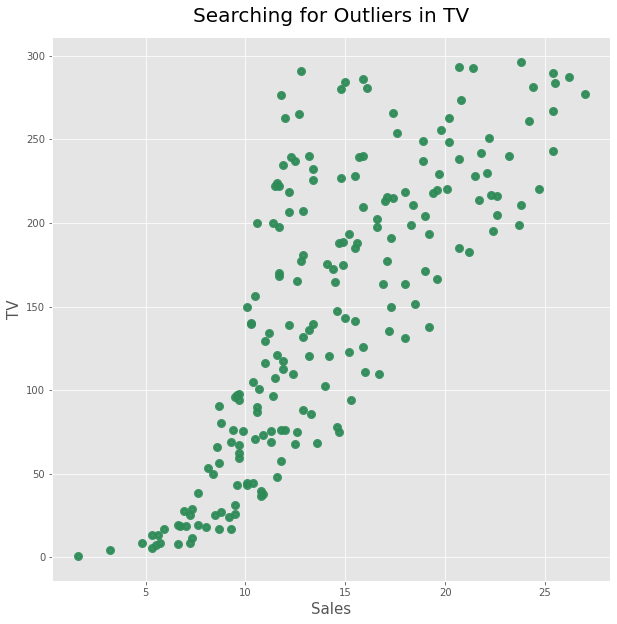

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(x, p, linewidth = 3, alpha = 0.9, color = "seagreen")

# customizing plot
plt.title("Searching for Outliers in TV", fontsize = 20, pad = 15)
plt.xlabel("Sales", size = 15)
plt.ylabel("TV", size = 15)

plt.show()

In conclusion, there're no `Outliers` in `TV` series.
The reason we treat `Outliers` before `Predictive Analysis` is because they affect the Model's accuracy.
The abnormality of `Outliers` distorts the `Model`.

##### Splitting Predictor and Target Variables

In [10]:
# set shuffle=False if series is Categorical and already shuffled, otherwise shuffle=True by default
p_train, p_test, x_train, x_test = train_test_split(p, x, train_size=0.8, random_state=99)

In [11]:
p_train

,TV
16,67.8
51,100.4
97,184.9
164,117.2
71,109.8
...,...
68,237.4
168,215.4
185,205.0
35,290.7


##### Initializing and Training the Model

In [12]:
# creating an object of linear regression, initializing
lr = LR()

# using fit to train model
lr.fit(p_train, x_train)

# Only the *train goes into the model

LinearRegression()

In [13]:
# intercept
lr.intercept_

7.204771031621269

In [14]:
# variable coefficient
lr.coef_

array([0.04666821])

In [15]:
# running predictive analysis
predicted = (lr.predict(p_test))
predicted

array([ 9.45884551, 10.94756137, 10.72822078,  8.6748196 ,  8.11013428,
       18.48447706, 18.39580747, 19.66051592,  7.56878306, 16.1230657 ,
       16.22106894, 10.32687419,  7.39611069,  8.08213335, 16.52907912,
        8.9874966 , 10.11220043, 16.8604234 , 16.52907912, 15.19903517,
        8.37614307, 11.39090935, 15.97372744, 15.72638593, 13.35097411,
       10.42487743, 14.93302638, 16.65508328, 17.36444005, 12.32894034,
       11.6942527 , 20.72455108, 16.72975242, 10.76555535, 13.7523207 ,
       14.88169135, 11.99759606, 14.19100187, 17.58378063,  8.45547902])

In [16]:
# comparison of predicted sales vs actual sales
for_comparison = pd.DataFrame({
    "p_test for TV" : p_test["TV"],
    "predicted_sales": predicted,
    "actual_sales": x_test
})

for_comparison

,p_test for TV,predicted_sales,actual_sales
135,48.3,9.458846,11.6
127,80.2,10.947561,8.8
191,75.5,10.728221,9.9
66,31.5,8.674820,9.5
119,19.4,8.110134,6.6
111,241.7,18.484477,21.8
81,239.8,18.395807,12.3
36,266.9,19.660516,25.4
126,7.8,7.568783,6.6
187,191.1,16.123066,17.3


In [17]:
# running performance test of the model based on test(out of the model data)
lr.score(p_test, x_test)

0.6449584792622444

In [18]:
# running performance test of the model
lr.score(p_train, x_train)

0.599673992908583

> with "Radio" added to Predictor

##### Splitting Predictor and Target Variable

In [20]:
# set shuffle=False if series is Categorical and already shuffled, otherwise shuffle=True by default
pr_train, pr_test, x_train, x_test = train_test_split(pr, x, train_size=0.8, random_state=99)

In [21]:
pr_train

,TV,Radio
16,67.8,36.6
51,100.4,9.6
97,184.9,21.0
164,117.2,14.7
71,109.8,14.3
...,...,...
68,237.4,27.5
168,215.4,23.6
185,205.0,45.1
35,290.7,4.1


##### Initializing and Training the Model

In [22]:
# creating an object of linear regression, initializing
lr = LR()

# using fit to train model
lr.fit(pr_train, x_train)

# Only the *train goes into the model, test is for comaparison

LinearRegression()

In [23]:
# intercept
lr.intercept_

2.9182159794452662

In [24]:
# variable coefficient
lr.coef_

array([0.04550633, 0.18861764])

In [26]:
# running predictive analysis
predicted = (lr.predict(pr_test))
predicted

array([13.98120086,  6.56782353,  8.39101433,  8.99165934,  6.81892104,
       21.08456601, 14.6039659 , 23.32530782, 10.61039165, 17.02780171,
       15.18060328,  8.16941578,  5.29275658,  7.8667378 , 12.59509511,
        5.35444301,  8.12984255, 13.91786355, 12.50078629, 18.20157048,
        8.90789825,  8.86744831, 14.71307857, 19.94180667, 12.38196408,
        7.81229673, 12.34024041, 16.33942094, 19.14363474, 16.93073418,
       10.0874659 , 24.07992565, 18.41157808, 11.57733402,  9.6611274 ,
       14.34611576, 13.17479815, 16.44530144, 13.68012343, 10.3621678 ])

In [29]:
# comparison of predicted sales vs actual sales
for_comparison = pd.DataFrame({
    "pr_test for TV" : pr_test["TV"],
    "pr_test for Radio": pr_test["Radio"],
    "predicted_sales": predicted,
    "actual_sales": x_test
})

for_comparison

,pr_test for TV,pr_test for Radio,predicted_sales,actual_sales
135,48.3,47.0,13.981201,11.6
127,80.2,0.0,6.567824,8.8
191,75.5,10.8,8.391014,9.9
66,31.5,24.6,8.991659,9.5
119,19.4,16.0,6.818921,6.6
111,241.7,38.0,21.084566,21.8
81,239.8,4.1,14.603966,12.3
36,266.9,43.8,23.325308,25.4
126,7.8,38.9,10.610392,6.6
187,191.1,28.7,17.027802,17.3


In [30]:
# running performance test of the model based on test(out of the model data)
lr.score(pr_test, x_test)

0.9202930325720751

In [31]:
# running performance test of the model
lr.score(pr_train, x_train)

0.8906197253189245

> with "Newspaper" added to Predictor

##### Splitting Predictor and Target Variable

In [55]:
# set shuffle=False if series is Categorical and already shuffled, otherwise shuffle=True by default
pn_train, pn_test, x_train, x_test = train_test_split(pn, x, train_size=0.8, random_state=99)
pn_train

,TV,Radio,Newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7
...,...,...,...
68,237.4,27.5,11.0
168,215.4,23.6,57.6
185,205.0,45.1,19.6
35,290.7,4.1,8.5


##### Initializing and Training the Model

In [56]:
# creating an object of linear regression, initializing
lr = LR()

# using fit to train model
lr.fit(pn_train, x_train)

# Only the *train goes into the model, test is for comaparison

LinearRegression()

In [57]:
# intercept
lr.intercept_

2.904485914076929

In [58]:
# variable coefficient
lr.coef_

array([0.04550574, 0.18820547, 0.00075244])

In [61]:
# running predictive analysis
predicted = lr.predict(pn_test)
predicted

array([13.95446559,  6.56096843,  8.37730268,  8.96942642,  6.81536408,
       21.0724867 , 14.61616898, 23.29712852, 10.61869678, 17.01582341,
       15.20861013,  8.17851346,  5.27853174,  7.88197539, 12.60600345,
        5.34954895,  8.12465182, 13.92041312, 12.501818  , 18.19974255,
        8.91614106,  8.87644672, 14.70561647, 19.95309416, 12.38660642,
        7.79536974, 12.33553347, 16.34015654, 19.16036183, 16.93591248,
       10.0968486 , 24.0871139 , 18.4187788 , 11.56426295,  9.65330308,
       14.35933948, 13.15512731, 16.42132385, 13.67471724, 10.34934211])

In [60]:
# comparison of predicted sales vs actual sales
for_comparison = pd.DataFrame({
    "pr_test for TV" : pn_test["TV"],
    "pr_test for Radio": pn_test["Radio"],
    "pr_test for Newspaper": pn_test["Newspaper"],
    "predicted_sales": predicted,
    "actual_sales": x_test
})

for_comparison

,pr_test for TV,pr_test for Radio,pr_test for Newspaper,predicted_sales,actual_sales
135,48.3,47.0,8.5,13.954466,11.6
127,80.2,0.0,9.2,6.560968,8.8
191,75.5,10.8,6.0,8.377303,9.9
66,31.5,24.6,2.2,8.969426,9.5
119,19.4,16.0,22.3,6.815364,6.6
111,241.7,38.0,23.2,21.072487,21.8
81,239.8,4.1,36.9,14.616169,12.3
36,266.9,43.8,5.0,23.297129,25.4
126,7.8,38.9,50.6,10.618697,6.6
187,191.1,28.7,18.2,17.015823,17.3


In [41]:
# running performance test of the model based on test(out of the model data)
lr.score(pn_test, x_test)

0.9200846680148507

In [42]:
# running performance test of the model
lr.score(pn_train, x_train)

0.8906288862925659

### Polynomials

In [43]:
from sklearn.preprocessing import PolynomialFeatures as pf

##### Seperating Predictor and Target Variables

In [45]:
# Predictor
pp = df1[["TV"]]

# Target
xp = df1["Sales"]

##### Splitting Predictor and Target Variable

In [62]:
# set shuffle=False if series is Categorical and already shuffled, otherwise shuffle=True by default
pp_train, pp_test, xp_train, xp_test = train_test_split(pp, xp, train_size=0.8, random_state=99)
pp_train

,TV
16,67.8
51,100.4
97,184.9
164,117.2
71,109.8
...,...
68,237.4
168,215.4
185,205.0
35,290.7


In [63]:

poly = pf(degree=6)

# fitting and transforming pp_train, using Fit
ppn_train = poly.fit_transform(pp_train)

# tranforming pp_test
ppn_test = poly.transform(pp_test)


##### Initializing and Training the Model

In [64]:
# creating an object of linear regression, initializing
lr = LR()

# using fit to train model
lr.fit(ppn_train, xp_train)

# Only the *train goes into the model, test is for comaparison

LinearRegression()

In [66]:
# running predictive analysis
ppredicted = lr.predict(ppn_test)
ppredicted

array([10.33285837, 11.38313403, 11.26639714,  9.08032015,  7.53411296,
       18.09739843, 18.09403464, 18.34922856,  5.31489331, 16.99778908,
       17.09703712, 11.04095226,  4.41921401,  7.43889794, 17.37943124,
        9.68046772, 10.90372045, 17.62961474, 17.37943124, 15.88399549,
        8.34633722, 11.62921396, 16.83846221, 16.55485602, 13.37681106,
       11.09880859, 15.52170312, 17.48131798, 17.89899611, 12.30228805,
       11.81844159, 20.13065492, 17.53781252, 11.28633642, 13.88773143,
       15.45062535, 12.03314086, 14.48379221, 17.97564188,  8.55842517])

#####  Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

In [69]:
# cv = cross validation
cross_val_score(lr, pn_train, x_train, scoring="neg_root_mean_squared_error", cv=5)

array([-1.50278866, -1.66938203, -1.68995496, -1.78696732, -2.26373623])

In [72]:
# cross_val_score(lr, pn_train, x_train, scoring="ng_root_mean_squared_error", cv=5)
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [77]:
# mean of cross validation across the fold
cross_val_score(lr, pn_train, x_train, scoring="neg_root_mean_squared_error", cv=5).mean()

-1.7825658414499645

In [80]:
# getting square root of the Neagtive root mean squared error
np.sqrt(-cross_val_score(lr, pn_train, x_train, scoring="neg_root_mean_squared_error", cv=5).mean())

1.3351276498709643

In [81]:
df2=pd.read_csv("Udata/ecom expense.csv")
df2.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
